In [159]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

In [148]:
fundexp = pd.read_csv('fund_expense.csv', encoding='utf-8').dropna()
print(fundexp.shape)
fundexp

(995, 3)


,type,fund,expense_ratio
0,AA1,兆豐國際第一基金,3.97%
1,AA1,兆豐國際國民基金,3.51%
2,AA2,兆豐國際全球基金,2.32%
3,AB1,兆豐國際萬全基金,2.44%
4,AA1,兆豐國際電子基金,3.04%
...,...,...,...
1377,AJ2,路博邁收益成長多重資產基金,2.00%
1379,AA2,路博邁5G股票基金,2.58%
1380,AC21,路博邁優質企業債券基金,1.74%
1382,AC21,路博邁ESG新興市場債券基金,2.09%


In [149]:
fundsize = pd.read_csv('fund_size.csv', encoding='utf-8').dropna()
print(fundsize.shape)
fundsize

(3570, 5)


,type,fund,fund_size,beneficial_units,total_beneficiaries
0,AA1,兆豐國際第一基金,"273,341,109","9,007,871.97",338
1,AB1,兆豐國際萬全基金,"348,871,395","8,332,019.21",958
2,AA2,兆豐國際全球基金,"1,166,804,670","26,704,053.92","3,457"
3,AA1,兆豐國際國民基金,"509,643,272","12,372,005.37","1,085"
4,AA1,兆豐國際豐台灣基金,"529,802,947","7,890,879.79","1,966"
...,...,...,...,...,...
5962,AA2,路博邁顛覆式創新股票基金N累積(人民幣),"12,471,890","285,631.39",2
5963,AA2,路博邁顛覆式創新股票基金T累積(澳幣),"62,746,195","311,025.26",2
5964,AA2,路博邁顛覆式創新股票基金N累積(澳幣),"23,460,088","116,289.70",2
5965,AA2,路博邁顛覆式創新股票基金T累積(南非幣),"72,087,370","4,137,079.44",2


In [150]:
funds = fundsize.merge(fundexp, on=['fund', 'type'], how='inner')
print(funds.shape)
funds

(483, 6)


,type,fund,fund_size,beneficial_units,total_beneficiaries,expense_ratio
0,AA1,兆豐國際第一基金,"273,341,109","9,007,871.97",338,3.97%
1,AB1,兆豐國際萬全基金,"348,871,395","8,332,019.21",958,2.44%
2,AA2,兆豐國際全球基金,"1,166,804,670","26,704,053.92","3,457",2.32%
3,AA1,兆豐國際國民基金,"509,643,272","12,372,005.37","1,085",3.51%
4,AA1,兆豐國際豐台灣基金,"529,802,947","7,890,879.79","1,966",4.57%
...,...,...,...,...,...,...
478,AA1,台新台灣中小基金,"366,780,704","4,743,328.80",552,2.47%
479,AA1,合庫台灣基金,"274,576,098","12,121,264.21",55,3.95%
480,AA2,合庫全球新興市場基金,"122,681,587","12,070,523.90",9,2.95%
481,AD1,合庫貨幣市場基金,"26,055,369,161","2,540,721,279.79",66,0.14%


In [151]:
funds['expense_ratio'] = funds.expense_ratio.str.replace('%', '').astype(float)
for column in funds.columns:
    try:
        funds[column] = funds[column].str.replace(',', '')
        funds[column] = funds[column].astype(float)
    except:
        pass
funds.dtypes

type                    object
fund                    object
fund_size              float64
beneficial_units       float64
total_beneficiaries    float64
expense_ratio          float64
dtype: object

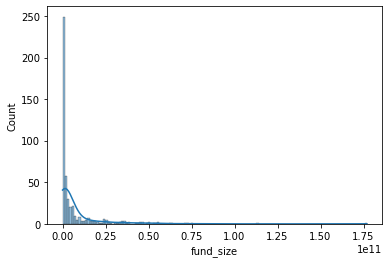

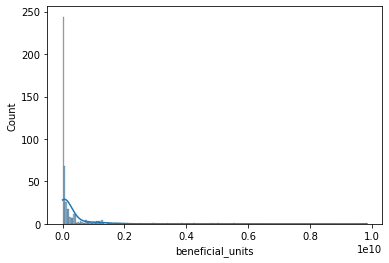

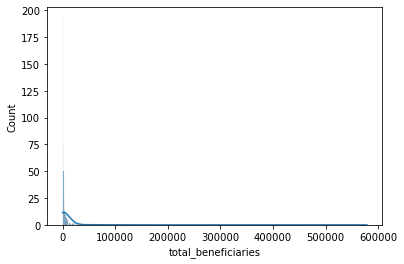

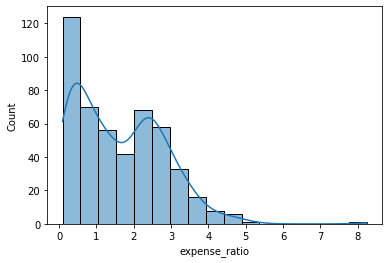

In [152]:
for col in funds.columns[2:7]:
    sns.histplot(funds[col], kde=True)
    plt.show()

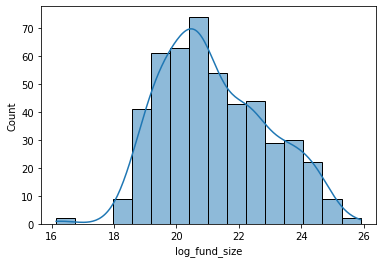

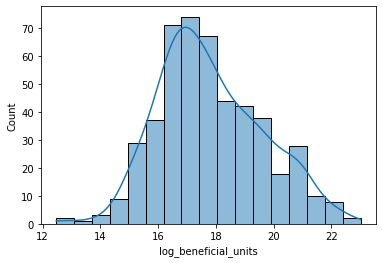

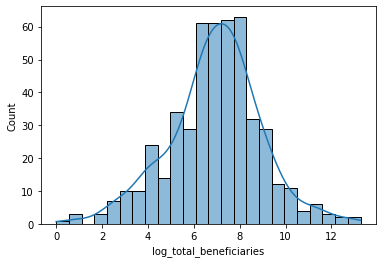

,type,fund,fund_size,beneficial_units,total_beneficiaries,expense_ratio,log_fund_size,log_beneficial_units,log_total_beneficiaries
0,AA1,兆豐國際第一基金,2.733411e+08,9.007872e+06,338.0,3.97,19.426231,16.013609,5.823046
1,AB1,兆豐國際萬全基金,3.488714e+08,8.332019e+06,958.0,2.44,19.670214,15.935616,6.864848
2,AA2,兆豐國際全球基金,1.166805e+09,2.670405e+07,3457.0,2.32,20.877535,17.100326,8.148156
3,AA1,兆豐國際國民基金,5.096433e+08,1.237201e+07,1085.0,3.51,20.049222,16.330947,6.989335
4,AA1,兆豐國際豐台灣基金,5.298029e+08,7.890880e+06,1966.0,4.57,20.088016,15.881218,7.583756
...,...,...,...,...,...,...,...,...,...
478,AA1,台新台灣中小基金,3.667807e+08,4.743329e+06,552.0,2.47,19.720275,15.372250,6.313548
479,AA1,合庫台灣基金,2.745761e+08,1.212126e+07,55.0,3.95,19.430739,16.310472,4.007333
480,AA2,合庫全球新興市場基金,1.226816e+08,1.207052e+07,9.0,2.95,18.625103,16.306277,2.197225
481,AD1,合庫貨幣市場基金,2.605537e+10,2.540721e+09,66.0,0.14,23.983490,21.655714,4.189655


In [153]:
for col in funds.columns[2:5]:
    funds[f"log_{col}"] = np.log(funds[col])
    sns.histplot(funds[f"log_{col}"], kde=True)
    plt.show()
funds

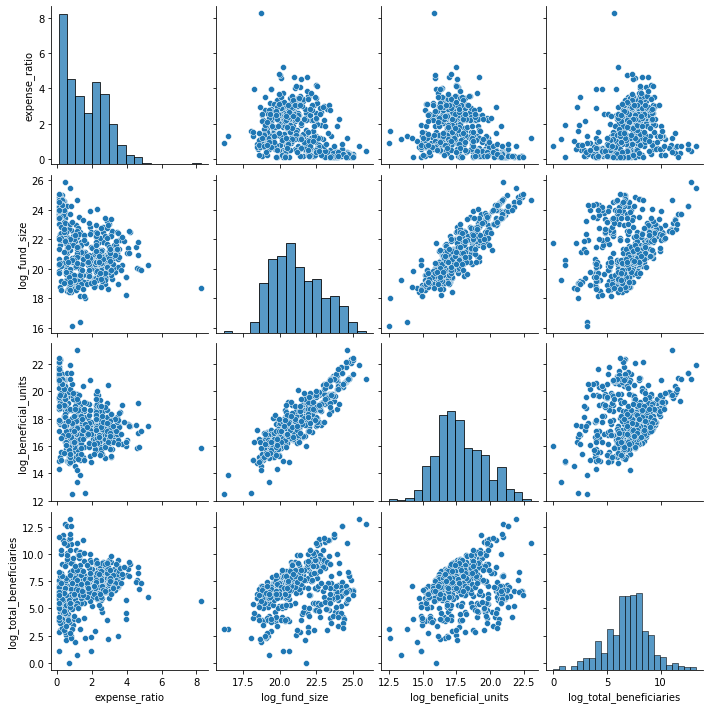

In [154]:
log_funds = funds.iloc[:, 5:9]
sns.pairplot(log_funds)
plt.show()

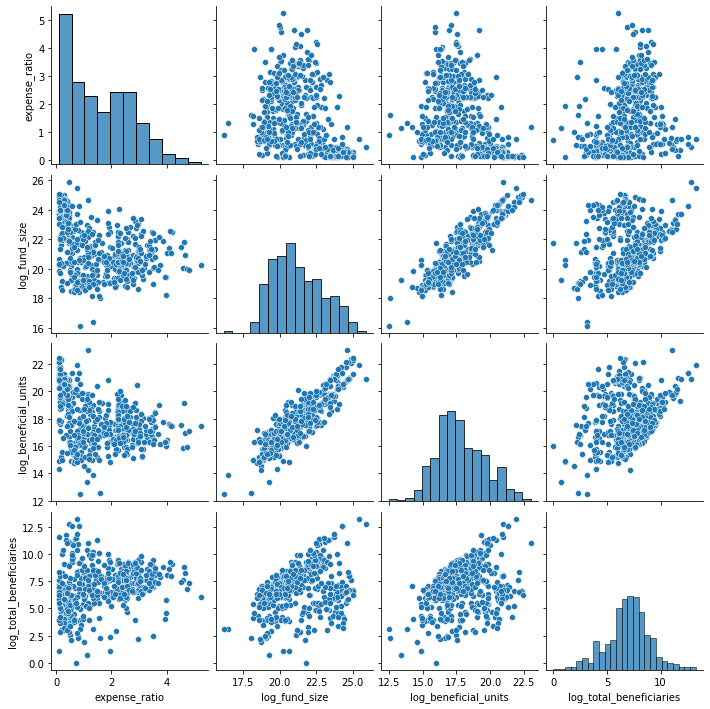

In [155]:
log_funds = log_funds.drop(funds.loc[funds['expense_ratio'] > 8].index)
sns.pairplot(log_funds)
plt.show()

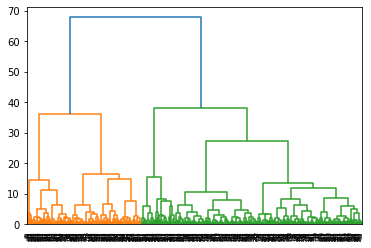

In [177]:
linked = linkage(log_funds, method='ward')
dendrogram(linked)
plt.savefig('dendrogram.png', transparent=True)
plt.show()

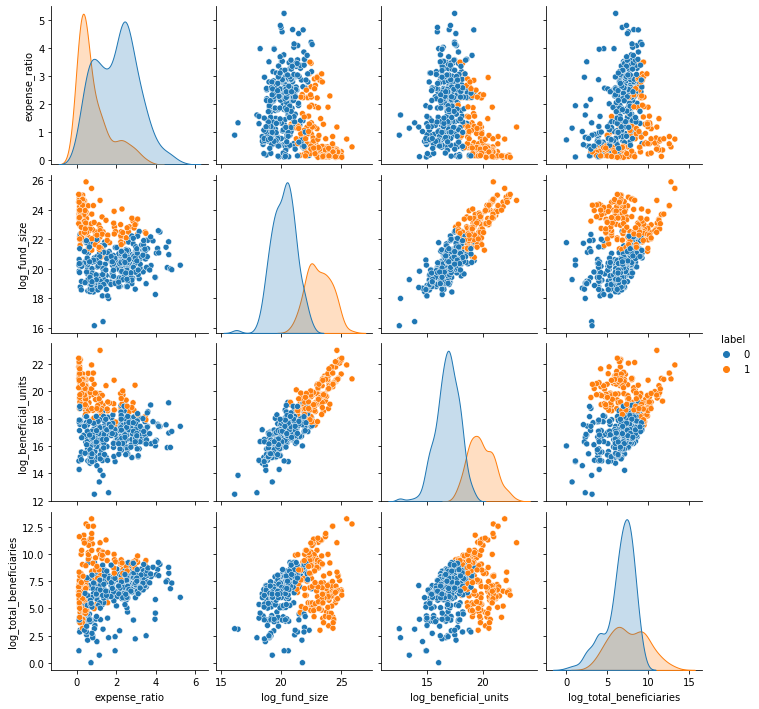

/Users/linjingxun/opt/anaconda3/envs/venv_py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


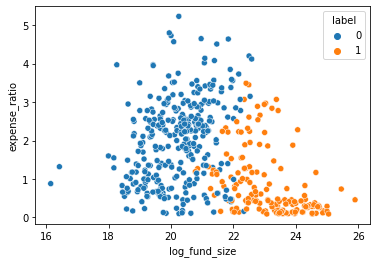

In [178]:
hclust = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels = hclust.fit_predict(log_funds)
log_funds['label'] = labels
sns.pairplot(log_funds, hue='label', palette='tab10')
plt.savefig('pairplot.png', transparent=True)
plt.show()
sns.scatterplot(log_funds['log_fund_size'], log_funds['expense_ratio'], hue=log_funds['label'], palette='tab10')
plt.savefig('size_and_expense.png', transparent=True)
plt.show()

In [181]:
log_funds.loc[log_funds['label'] == 0]['expense_ratio'].mean()

2.0056782334384855

In [182]:
log_funds.loc[log_funds['label'] == 1]['expense_ratio'].mean()

0.8463636363636364